Frequency sampling 44100
Complete Samplings N 132301
secs 3.0000226757369615
Time between interval 2.2675736961451248e-05
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 2.99995465e+00
 2.99997732e+00 3.00000000e+00]


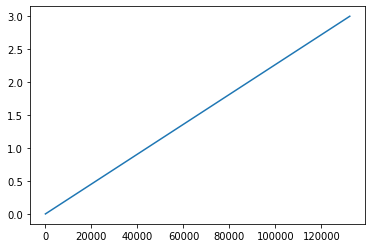

In [43]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np

rate, data = wav.read('test2.wav')
print("Frequency sampling", rate)
N = data.shape[0]
print ("Complete Samplings N", N)
secs = N / float(rate)
print ("secs", secs)
Ts = 1.0/rate
print("Time between interval", Ts)
t = np.arange(0, secs, Ts)
print(t)
a = data
b=[ele/2 for ele in a]
c = fft(b) # calculate fourier transform (complex numbers list)
d = round(len(c)/2)
%matplotlib inline
plt.plot(t) 
plt.show()

Frequency sampling 44100
Channels 1
Complete Samplings N 132300
secs 3.0
Timestep between samples Ts 2.2675736961451248e-05
[1241.99061232]


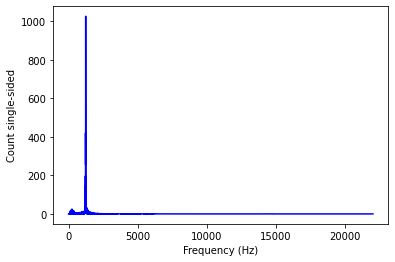

In [75]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
from scipy.fftpack import fft
import numpy as np
from matplotlib import pyplot as plt

fs_rate, signal = wavfile.read("output.wav")
print ("Frequency sampling", fs_rate)
l_audio = len(signal.shape)
print ("Channels", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0]
print ("Complete Samplings N", N)
secs = N / float(fs_rate)
print ("secs", secs)
Ts = 1.0/fs_rate # sampling interval in time
print ("Timestep between samples Ts", Ts)
t = np.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
FFT = abs(fft(signal))
FFT_side = FFT[range(N//2)] # one side FFT range
freqs_side = freqs[range(N//2)] # one side frequency range
index = np.where(FFT_side == np.amax(FFT_side))
print(freqs_side[index[0]])
p3 = plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()

In [73]:
import sounddevice as sd
from scipy.io.wavfile import write, read
fs = 44100  
seconds = 3
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  
write('output.wav', fs, myrecording)